This is a language analysis notebook.

In [64]:
def lang_confidence_score(word_counts: dict[str, float], language_words_with_frequency: dict[str, float]) -> float:
    number_of_words = 0
    for val in word_counts.items():
        number_of_words += val[1]
    deviation = 0
    for word in word_counts:
        if(word not in word_counts or word not in language_words_with_frequency):
            deviation += 1
        else:
            deviation += (word_counts[word] / number_of_words - language_words_with_frequency[word])**2
    return 1 - deviation / len(word_counts)


In [72]:
import wordfreq 

def create_lang_dict(size, language):
    words = wordfreq.top_n_list(language, size, wordlist='best')
    d = {w: wordfreq.word_frequency(w, language) for w in set(words)}
    return d


en_dict = create_lang_dict(1000, 'en')
fr_dict = create_lang_dict(1000, 'fr')
de_dict = create_lang_dict(1000, 'de')

Create large article dictionary

In [59]:
import json
import os
from pathlib import Path

p = Path('./word-counts.json')

if(p.exists()):
    p.unlink()

%run wikiscraper.py --count-words Ash

with open('./word-counts.json', 'r') as file:
    large_article = json.load(file)



Take article with low fr and de scores

In [65]:
p = Path('./word-counts.json')

if(p.exists()):
    p.unlink()

%run wikiscraper.py --count-words 'Type'

with open('./word-counts.json', 'r') as file:
    interesting_article = json.load(file)

# Verify that the score is low for fr and de but not english

print(interesting_article)

print(lang_confidence_score(interesting_article, en_dict))
print(lang_confidence_score(interesting_article, fr_dict))
print(lang_confidence_score(interesting_article, de_dict))


{'if': 18, 'you': 1, 'were': 7, 'looking': 1, 'for': 40, 'the': 218, 'property': 2, 'of': 106, 'a': 103, 'pokémon': 168, 'called': 1, 'type': 198, 'in': 92, 'official': 3, 'handbook': 3, 'see': 6, 'category': 3, 'types': 83, 'normal': 25, 'fire': 23, 'fighting': 19, 'water': 21, 'flying': 19, 'grass': 22, 'poison': 19, 'electric': 16, 'ground': 20, 'psychic': 17, 'rock': 17, 'ice': 21, 'bug': 19, 'dragon': 25, 'ghost': 19, 'dark': 16, 'steel': 20, 'fairy': 20, 'stellar': 9, 'japanese': 8, 'タイプ': 1, 'are': 53, 'properties': 2, 'applied': 2, 'to': 72, 'and': 88, 'their': 7, 'moves': 47, 'which': 15, 'affect': 3, 'power': 8, 'battles': 2, 'as': 44, 'generation': 30, 'ix': 5, 'there': 12, 'with': 30, 'regular': 7, 'special': 6, 'most': 4, 'introduced': 6, 'during': 2, 'i': 7, 'but': 9, 'ii': 10, 'was': 5, 'vi': 6, 'unique': 6, 'also': 14, 'existed': 1, 'from': 18, 'generations': 5, 'iv': 7, 'largely': 1, 'based': 6, 'on': 30, 'concept': 1, 'classical': 1, 'elements': 2, 'popular': 1, 'cult

Create english, french and german dictionaries based on classic literature

In [69]:
def text_to_dict(book_path):
    with open(book_path, 'r') as file:
        text_content = file.read()
    text_content = ''.join(list(map(lambda c: c.lower() if (c.isalpha() or c == ' ') else ' ', text_content)))
    
    counter: dict[str, int] = {}
    for word in text_content.split():
        counter[word] = counter.get(word, 0) + 1
    return counter


In [ ]:
frankenstein_dict = text_to_dict('./frankenstein.txt')
faust_dict = text_to_dict('./faust.txt')
candide_dict = text_to_dict('./candide.txt')

{'oeuvres': 6, 'de': 1463, 'voltaire': 25, 'tome': 33, 'xxxiii': 2, 'l': 452, 'imprimerie': 2, 'a': 175, 'firmin': 1, 'didot': 1, 'rue': 5, 'jacob': 1, 'nº': 2, 'préfaces': 1, 'avertissements': 1, 'notes': 8, 'etc': 4, 'par': 134, 'm': 98, 'beuchot': 2, 'romans': 2, 'i': 7, 'paris': 14, 'chez': 37, 'lefèvre': 1, 'libraire': 2, 'éperon': 1, 'kº': 1, 'werdet': 1, 'et': 982, 'lequien': 1, 'fils': 12, 'du': 289, 'battoir': 1, 'mdcccxxix': 1, 'candide': 413, 'ou': 46, 'optimisme': 7, 'préface': 2, 'éditeur': 2, 'chapitre': 79, 'comment': 56, 'fut': 71, 'élevé': 6, 'dans': 351, 'un': 539, 'beau': 32, 'château': 23, 'il': 683, 'chassé': 8, 'd': 424, 'icelui': 2, 'ii': 5, 'ce': 273, 'que': 493, 'devint': 9, 'parmi': 6, 'les': 584, 'bulgares': 23, 'iii': 5, 'se': 164, 'sauva': 2, 'entre': 22, 'qu': 324, 'iv': 6, 'rencontra': 6, 'son': 144, 'ancien': 6, 'maître': 40, 'philosophie': 6, 'le': 820, 'docteur': 18, 'pangloss': 102, 'qui': 376, 'en': 422, 'advint': 8, 'v': 2, 'tempête': 4, 'naufrage':

Create DataFrame with all 15 combinations

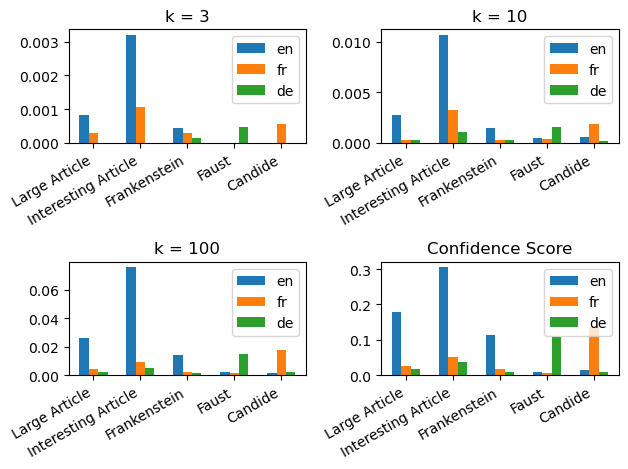

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

texts = [large_article, interesting_article, frankenstein_dict, faust_dict, candide_dict]
labels = ['Large Article', 'Interesting Article', 'Frankenstein', 'Faust', 'Candide']
languages = ['en', 'fr', 'de']

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for idx, k in enumerate([3, 10, 100, 1000]):
    matrix = np.empty([len(texts), len(languages)])
    for i, t in enumerate(texts):
        for j, l in enumerate(languages):
            matrix[i][j] = lang_confidence_score(t, create_lang_dict(k, l))

    x = np.arange(len(texts))
    width = 0.2
    ax = axes[idx]
        
    for j, l in enumerate(languages):
        ax.bar(x + j*width, matrix[:, j], width, label=l)
        
    ax.set_xticks(x + width)
    ax.set_xticklabels(labels, rotation = 30, ha='right')
    ax.set_title(f'k = {k}')
    ax.legend()

fig.suptitle('Confidence Score')
plt.tight_layout()
plt.show()
